In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../final_results_on_measurement_data_0.2_run2_copy.csv')

# filter df on column "function_type" 
df_floatmatmult = df[df['function_type'] == 'floatmatmult']  
df_linpack = df[df['function_type'] == 'linpack']
df_imageprocess = df[df['function_type'] == 'imageprocess']
df_videoprocess = df[df['function_type'] == 'videoprocess']
df_encrypt = df[df['function_type'] == 'encrypt']

function_dfs = {
    'floatmatmult': df_floatmatmult,
    'linpack': df_linpack,
    'imageprocess': df_imageprocess,
    'videoprocess': df_videoprocess,
    'encrypt': df_encrypt
}

function_slos = {
    'floatmatmult': 76132.2,
    'linpack': 45008.67293666026,
    'imageprocess': 5491.8,
    'videoprocess': 20592.6,
    'encrypt': 41125.799999999996
}

In [3]:
function_errs = {
    'floatmatmult': [],
    'linpack': [],
    'imageprocess': [],
    'videoprocess': [],
    'encrypt': []
}

In [6]:
gt_floatmatmult = pd.read_csv('../../data_processing/filtered_data/filtered_floatmatmult.csv')
gt_linpack = pd.read_csv('../../data_processing/filtered_data/filtered_linpack.csv')
gt_imageprocess = pd.read_csv('../../data_processing/filtered_data/filtered_imageprocess.csv')
gt_videoprocess = pd.read_csv('../../data_processing/filtered_data/filtered_videoprocess.csv')
gt_encrypt = pd.read_csv('../../data_processing/filtered_data/filtered_encrypt.csv')

gt_dfs = {
    'floatmatmult': gt_floatmatmult,
    'linpack': gt_linpack,
    'imageprocess': gt_imageprocess,
    'videoprocess': gt_videoprocess,
    'encrypt': gt_encrypt
}

In [20]:
gt_dfs['floatmatmult']['inputs'][35]

'["matrix1_1000_0.3.txt", "matrix1_1000_0.3.txt"]'

In [19]:
function_dfs['floatmatmult']['function_input'][3].replace("'", '"') == gt_dfs['floatmatmult']['inputs'][0]

True

In [32]:
function_dfs['linpack']['function_input'][6].replace("'", '"')

'["3000"]'

In [36]:
list(eval(gt_dfs['encrypt']['inputs'][1]))

['500.0', '25.0']

In [39]:
def get_fxn_input(orig_input):
    list_input = eval(orig_input)
    func_input_str = f'['
    for i, param in enumerate(list_input):
        final_param = None
        try:
            param_int = int(param)
            final_param = str(float(param_int))
        except:
            final_param = param
        func_input_str += f'"{final_param}"'
        if (i < len(list_input) - 1):
            func_input_str += ', '
        else:
            func_input_str += ']'
    return func_input_str

In [52]:
test = get_fxn_input(function_dfs['floatmatmult']['function_input'][3])
test

'["matrix1_1000_0.3.txt", "matrix1_1000_0.3.txt"]'

In [54]:
gt_dfs['floatmatmult']['inputs'][0] == test

True

In [55]:
for function in function_dfs.keys():
    gt_df = gt_dfs[function]
    experiment_df = function_dfs[function]
    for i, row in experiment_df.iterrows():
        orig_input = row['function_input']
        func_input = get_fxn_input(orig_input)
        gt_filtered = gt_df[gt_df['inputs'] == func_input]
        if (len(gt_filtered) == 0):
            raise ValueError(f'Function input {func_input} not found in ground truth data for function {function}')
        gt_min_energy = gt_filtered['median_energy'].min()
        err = abs(gt_min_energy - row['energy'])
        function_errs[function].append(err)


In [58]:
import matplotlib.pyplot as plt
def plot_error_hist(errs, function_name):
    fxn_errs = errs[function_name]
    plt.plot(fxn_errs)
    plt.xlabel('Experiment Number')
    plt.ylabel('Error (J)')
    plt.title(f'Error in Energy Consumption for {function_name} Function Over Time')

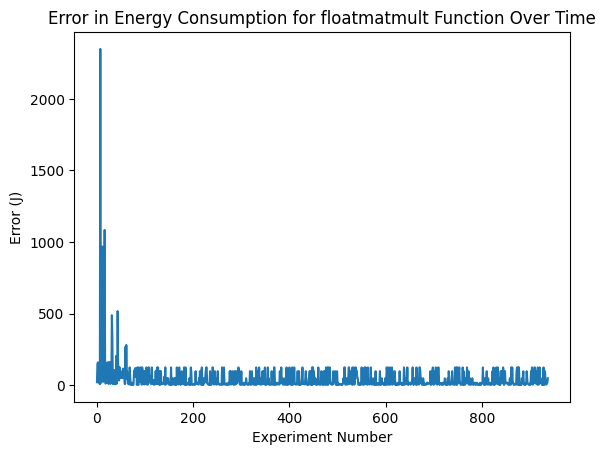

In [59]:
plot_error_hist(function_errs, 'floatmatmult')

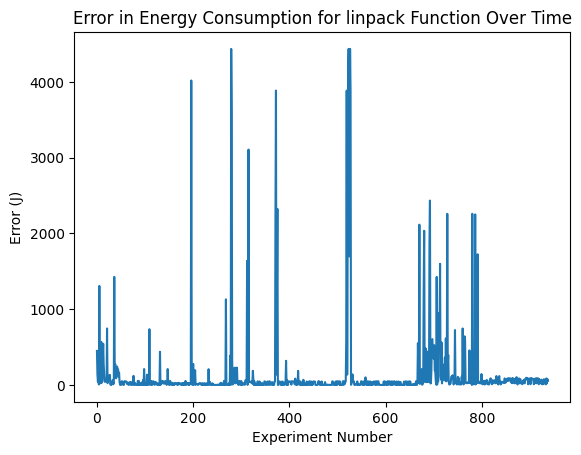

In [60]:
plot_error_hist(function_errs, 'linpack')

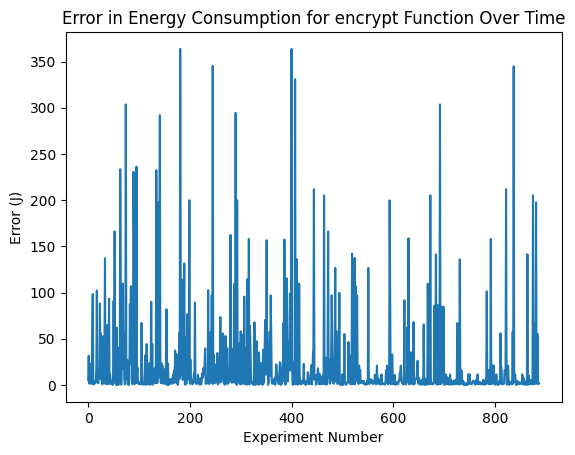

In [61]:
plot_error_hist(function_errs, 'encrypt')

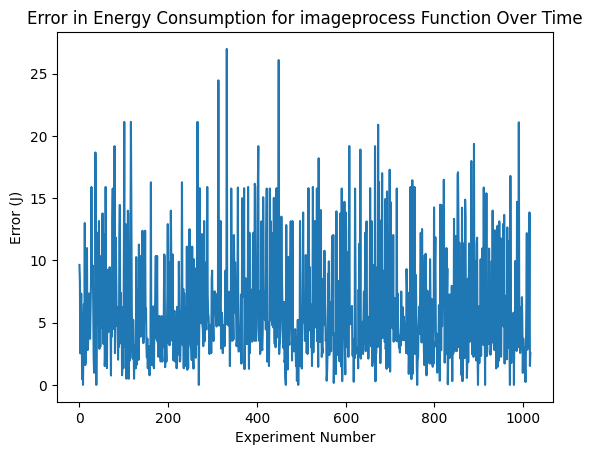

In [62]:
plot_error_hist(function_errs, 'imageprocess')

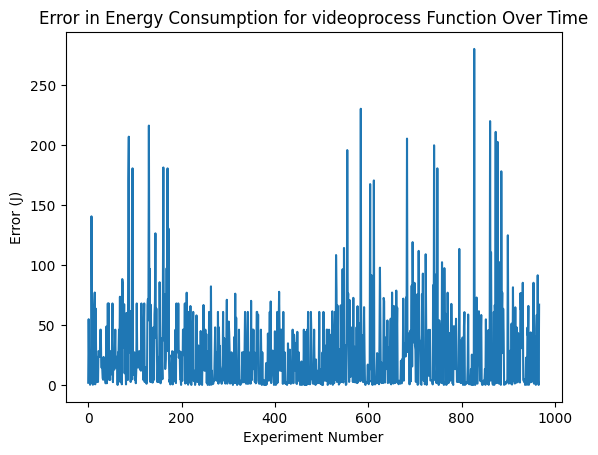

In [63]:
plot_error_hist(function_errs, 'videoprocess')